<a href="https://colab.research.google.com/github/busranur-sr/ClimateChange/blob/main/Co2Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('out.csv')

df['Date']=df['Date'].str.split(expand=True)[0] # Date verisi object halindeydi. İçinde veri "1990 [YR1990]" bu şekilde bulunuyordu. İlk kısım çekildi.	
df=df.replace('..', np.nan) # Boş veriler .. şeklinde gösteriliyordu. Nan haline getirildi.
df=df.rename(columns={"CO2 emissions from liquid fuel consumption (kt)": "Liquid Co",  # Column isimlerinin düzenlenmesi
                      "CO2 emissions from gaseous fuel consumption (kt)" :"Gaseous Co",
                      "CO2 emissions from solid fuel consumption (kt)" : "Solid Co",
                      "CO2 emissions (kt)":"Total Co"})
s = df.drop('Country Name',1).select_dtypes(include='object').columns  # data type object-> float. Üzerinde işlem yapabilmek için 
df[s] = df[s].astype("float")
df=df.astype({'Date':'int16','Country Name':'str'})
df=df[df['Date']<2016] # Rest of years's data is empty


In [ ]:
df.head(5)

,Country Name,Date,Access to electricity (% of population),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)","Annual freshwater withdrawals, total (billion cubic meters)",Arable land (% of land area),Average precipitation in depth (mm per year),CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions (kg per 2017 PPP $ of GDP),CO2 emissions (kg per PPP $ of GDP),Total Co,CO2 emissions (metric tons per capita),CO2 emissions from gaseous fuel consumption (% of total),Gaseous Co,CO2 emissions from liquid fuel consumption (% of total),Liquid Co,CO2 emissions from solid fuel consumption (% of total),Solid Co,CO2 intensity (kg per kg of oil equivalent energy use),CPIA public sector management and institutions cluster average (1=low to 6=high),Cereal yield (kg per hectare),"Community health workers (per 1,000 people)",Disaster risk reduction progress score (1-5 scale; 5=best),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Ease of doing business rank (1=most business-friendly regulations),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),Electricity production from oil sources (% of total),"Electricity production from renewable sources, excluding hydroelectric (% of total)","Electricity production from renewable sources, excluding hydroelectric (kWh)",Energy use (kg of oil equivalent per capita),"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)","Foreign direct investment, net inflows (% of GDP)",Forest area (% of land area),Forest area (sq. km),GHG net emissions/removals by LUCF (Mt of CO2 equivalent),HFC gas emissions (thousand metric tons of CO2 equivalent),Land area where elevation is below 5 meters (% of total land area),Marine protected areas (% of territorial waters),Methane emissions (% change from 1990),Methane emissions (kt of CO2 equivalent),"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",PFC gas emissions (thousand metric tons of CO2 equivalent),Population growth (annual %),Population in urban agglomerations of more than 1 million (% of total population),Population living in areas where elevation is below 5 meters (% of total population),"Population, total",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Primary completion rate, total (% of relevant age group)",Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Rural population living in areas where elevation is below 5 meters (% of total population),SF6 gas emissions (thousand metric tons of CO2 equivalent),"School enrollment, primary and secondary (gross), gender parity index (GPI)",Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions (% change from 1990),Total greenhouse gas emissions (kt of CO2 equivalent),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Urban population,Urban population (% of total population),Urban population growth (annual %),Urban population living in areas where 

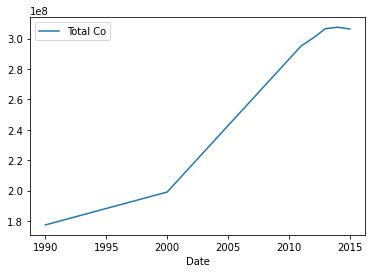

In [ ]:
df_ToCo = df[['Date','Total Co','Country Name']]
df_ToCo.groupby('Date').sum().plot()


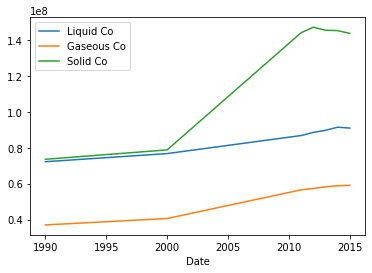

In [ ]:
df_Co = df[['Date','Country Name','Liquid Co','Gaseous Co','Solid Co']]
df_Co.groupby(df_Co['Date']).sum().plot() # Toplam yayılım mı mantıklı yoksa ortalama mı
#Because of the dataset, after 2017 all values Nan. So We plot before this year. 

Combining two different data sets about Turkey

In [ ]:
df_TotalCo_Turkey=pd.read_excel('Turkey_CO2.xls')
df_TotalCo_Turkey=df_TotalCo_Turkey.transpose()
df_TotalCo_Turkey=df_TotalCo_Turkey.reset_index()
df_TotalCo_Turkey

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,"CO2 emisyonları, 1990 - 2019","CO2 emissions, 1990 - 2019",NaN,Sera gazı kaynakları \nGreenhouse gas sources,Toplam \nTotal,Enerji\nEnergy,Yakıt yanması\nFuel combustion,Çevrim ve enerji sektörü\nEnergy industries,İmalat sanayi ve inşaat\nManufacturing industr...,Ulaştırma\nTransport,Diğer sektörler\nOther sectors,Kaçak emisyonlar\nFugitive emissions from fuels,Karbondioksit taşıma ve depolama \nCarbon diox...,Endüstriyel işlemler ve ürün kullanımı\nIndust...,Mineral ürünleri\nMineral products,Kimya sanayi\nChemical industry,Metal üretimi\nMetal production,Enerji dışı yakıt ve solvent kullanımı\nNon-en...,Tarım\nAgriculture,Üre uygulaması\nUrea application,Atık\nWaste,Atıkların açıkta yakılması\nOpen burning of waste,NaN,"TÜİK, Sera Gazı Emisyon İstatistikleri, 1990 -...","TurkStat, Greenhouse Gas Emissions Statistics,...","Tablodaki rakamlar, yuvarlamadan dolayı toplam...",Figures in table may not add up to totals due ...,Tablodaki 1990-2018 verileri revize edilmiştir.,Data in table were revised for the period of 1...,Ormancılık ve diğer arazi kullanımından kaynak...,The emissions and removals from forestry and o...
1,Unnamed: 1,NaN,NaN,1990,151508,129882,129662,37130.3,37004,26250.8,29276.9,220.204,0.126,21139.6,13423.7,565.24,6967.34,183.366,459.946,459.946,26.5923,26.5923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unnamed: 2,NaN,NaN,1995,180903,156827,156618,50297.9,39842.8,33180,33297.2,209.114,0.126,23624.1,17549.4,472.113,5399.71,202.822,425.923,425.923,25.9632,25.9632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unnamed: 3,NaN,NaN,2000,229791,204511,204343,77502.7,57657.3,35490.2,33692.7,167.848,0.126,24641.2,18417.6,214.272,5732.24,277.112,617.474,617.474,20.9753,20.9753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Unnamed: 4,NaN,NaN,2005,264201,232409,232267,89665.8,62731.1,41043.8,38826.2,141.602,0.126,31167.1,23246.4,591.285,6883.74,445.738,613.163,613.163,11.8721,11.8721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Unnamed: 5,NaN,NaN,2010,314380,270820,270663,112091,52119.6,44382.6,62069.8,156.157,0.126,42904.1,33393.8,249.559,8829.16,431.587,644.984,644.984,11.21,11.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Unnamed: 6,NaN,NaN,2011,339482,291845,291695,123669,52379.7,46366.8,69279.4,150.521,0.126,47065.4,35297.6,1011.98,9902.12,853.741,557.55,557.55,14.0933,14.0933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Unnamed: 7,NaN,NaN,2012,353666,304432,304288,124753,60821.1,61248.5,57465.5,143.695,0.126,48580.3,36384.4,1191.96,10398.4,605.519,639.769,639.769,14.4163,14.4163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Unnamed: 8,NaN,NaN,2013,345221,292914,292768,119519,52772,67478.1,52998.7,145.537,0.126,51492.3,39618.1,792.805,10547.9,533.588,807.301,807.301,7.37239,7.37239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Unnamed: 9,NaN,NaN,2014,361675,309259,309113,130128,54232.9,72084.3,52668.2,145.487,0.126,51628.3,39854.6,976.189,10398.3,399.159,787.69,787.69,0.477287,0.477287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = zip(df_TotalCo_Turkey[2][1:].tolist(),df_TotalCo_Turkey[5][1:].tolist())
df2 = pd.DataFrame(data, columns = ['Date', 'Fuel combustion'])
df2=df2.astype({'Date':'int16','Fuel combustion':'float64'})
df3=pd.merge(df_Co[df_Co['Country Name']=='Turkey'],df_ToCo[df_ToCo['Country Name']=='Turkey'])
df_Turkey=pd.merge(df3[df3['Country Name']=='Turkey'],df2,on='Date',how='right')
df_Turkey

,Date,Country Name,Liquid Co,Gaseous Co,Solid Co,Total Co,Fuel combustion
0,1990,Turkey,61334.242,6538.261,65873.988,139220.0,129661.990751
1,1995,NaN,NaN,NaN,NaN,NaN,156617.834697
2,2000,Turkey,81876.776,28943.631,87215.928,216620.0,204342.982663
3,2005,NaN,NaN,NaN,NaN,NaN,232266.890943
4,2010,NaN,NaN,NaN,NaN,NaN,270663.498970
5,2011,Turkey,74524.441,84256.659,130717.549,317720.0,291694.543162
6,2012,Turkey,76948.328,85342.091,133288.116,328880.0,304287.890826
7,2013,Turkey,77465.375,86013.152,126364.820,318170.0,292767.905965
8,2014,Turkey,79434.554,92082.037,138861.956,340640.0,309113.418599
9,2015,Turkey,91535.654,90200.866,132983.755,351590.0,329627.199092


Turkey Co2 Emissions from fuel combustions over the years

Text(0.5, 0, 'Years')

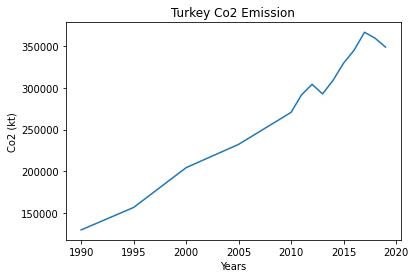

In [ ]:
df_Turkey=df_Turkey.set_index('Date')
df_Turkey['Fuel combustion'].plot()
plt.title("Turkey Co2 Emission")
plt.ylabel("Co2 (kt)")
plt.xlabel("Years")

Co2 amounts from solid liquid and gas fuels in Turkey

Text(0.5, 0, 'Years')

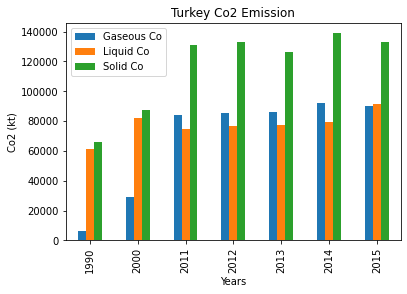

In [ ]:
df_Turkey[['Gaseous Co','Liquid Co','Solid Co']].dropna(how='all').plot(kind='bar')
plt.title("Turkey Co2 Emission")
plt.ylabel("Co2 (kt)")
plt.xlabel("Years")


Correlation of Total Co2 with heatmap

In [ ]:
df_corr=df.corr()['Total Co'].sort_values(key=abs,ascending=[False])[:15]
print(df_corr)
x=np.array((df_corr)).reshape(15,1)
x=pd.DataFrame(x,index=df_corr.index)

Total Co                                                            1.000000
Total greenhouse gas emissions (kt of CO2 equivalent)               0.995462
Solid Co                                                            0.972687
Urban land area where elevation is below 5 meters (sq. km)          0.969866
Liquid Co                                                           0.956372
Urban population                                                    0.953982
Gaseous Co                                                          0.935053
Rural land area where elevation is below 5 meters (sq. km)          0.934274
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)    0.933285
Methane emissions (kt of CO2 equivalent)                            0.929469
SF6 gas emissions (thousand metric tons of CO2 equivalent)          0.918335
Agricultural land (sq. km)                                          0.899988
Population, total                                                   0.896727

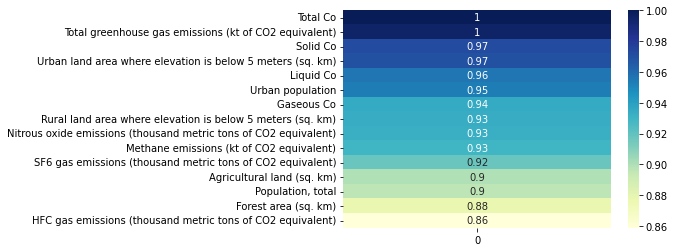

In [ ]:
dataplot = sns.heatmap(x, cmap="YlGnBu", annot=True)

In [ ]:
df_mostco2=df[['Country Name','Date','Total Co']]
df_mostco2=df_mostco2.pivot_table('Total Co',['Country Name'],'Date')
df_perc=df_mostco2
df_mostco2=df_mostco2.sum(axis='columns').sort_values(ascending=[False])[0:35] # Dataset contain not only countries but also specific areas like ' Lower middle income' or 'Early-demographic dividend'. We dont take them
df_mostco2

Country Name
World                                                   2.074503e+08
IDA & IBRD total                                        1.211121e+08
Low & middle income                                     1.176576e+08
IBRD only                                               1.164640e+08
Middle income                                           1.164546e+08
Upper middle income                                     8.806306e+07
High income                                             8.763156e+07
OECD members                                            8.537851e+07
Late-demographic dividend                               8.379468e+07
East Asia & Pacific                                     8.067655e+07
Post-demographic dividend                               8.036501e+07
East Asia & Pacific (excluding high income)             6.176821e+07
East Asia & Pacific (IDA & IBRD countries)              6.141337e+07
China                                                   5.399096e+07
Europe & Central Asia

Countries with the highest CO2 emissions over the years

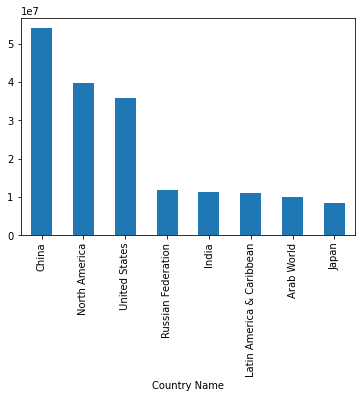

In [ ]:
df_mostco2[['China','North America','United States','Russian Federation','India','Latin America & Caribbean','Arab World','Japan']].plot(kind='bar')

In [ ]:
df_perc=df_perc.pct_change(axis='columns')
print(df_perc)

Date                         1990      2000  ...      2014      2015
Country Name                                 ...                    
Afghanistan                   NaN -0.739865  ... -0.082256  0.023047
Africa Eastern and Southern   NaN  0.156396  ...  0.036777 -0.025712
Africa Western and Central    NaN  0.324798  ...  0.033595 -0.027111
Albania                       NaN -0.476033  ...  0.089770 -0.028736
Algeria                       NaN  0.157608  ...  0.068509  0.051581
...                           ...       ...  ...       ...       ...
Vietnam                       NaN  1.732754  ...  0.097182  0.241101
World                         NaN  0.131211  ...  0.000948 -0.004285
Yemen, Rep.                   NaN  1.091867  ...  0.013662 -0.467990
Zambia                        NaN -0.339416  ...  0.132075  0.056250
Zimbabwe                      NaN -0.171204  ... -0.016990  0.020576

[239 rows x 7 columns]


Countries with the highest increase rate of CO2 emissions over the years

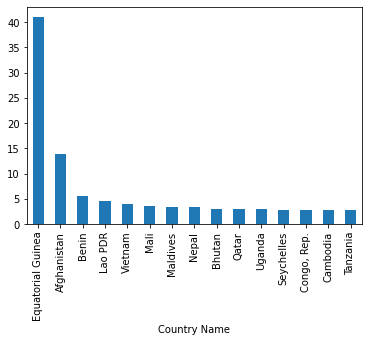

In [ ]:
df_perc.replace([np.inf, -np.inf], np.nan, inplace=True)
df_perc.sum(axis='columns').sort_values(ascending=[False])[:15].plot(kind='bar')